In [ ]:
pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 11.2 MB/s eta 0:00:00


In [ ]:
pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136818 sha256=8dc0beba854e771f0393aeea24f9c31aa848289d407b2d12bb8ffc7b8045de64
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
pip install qiskit-ibmq-provider

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 4.0 MB/s eta 0:00:00


In [ ]:
pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 85.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit import QuantumCircuit, QuantumRegister, transpile, execute
from qiskit.quantum_info import random_statevector
from qiskit.quantum_info import partial_trace, entropy
import qiskit.quantum_info as qi
from qiskit.tools.visualization import plot_state_qsphere
from qiskit.tools.monitor import job_monitor

In [ ]:
import scipy as s1
import sympy as s2

In [ ]:
simulator = Aer.get_backend('qasm_simulator')

# Calculating 'ρAB' and then 'ρB' before entanglement breaks

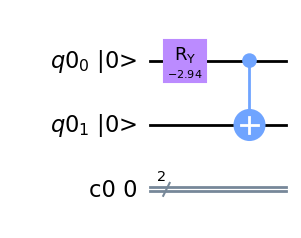

In [ ]:
from sympy.logic import true

qr = QuantumRegister(2)
cr = ClassicalRegister(2)

qc = QuantumCircuit(qr, cr)

# Define the parameters
k=0.2
h=1

#Prepare the ground state
alpha=-np.arcsin((1/np.sqrt(2))*(np.sqrt(1+h/np.sqrt(h**2+k**2))))

qc.ry(2*alpha,qr[0])
qc.cx(qr[0],qr[1])

qc.draw(output='mpl', initial_state = True)

In [ ]:
psi_AB = qi.Statevector.from_instruction(qc)
psi_AB.draw('latex', prefix='|\\psi_{AB}\\rangle = ')

<IPython.core.display.Latex object>

In [ ]:
# qc.save_statevector()
# s_vec = simulator.run(qc).result().get_statevector()
# array_to_latex(s_vec, prefix='|\\psi_{AB}\\rangle = ')

In [ ]:
rho_AB = qi.DensityMatrix.from_instruction(qc)
rho_AB.draw('latex', prefix='\\rho_{AB} = ')

<IPython.core.display.Latex object>

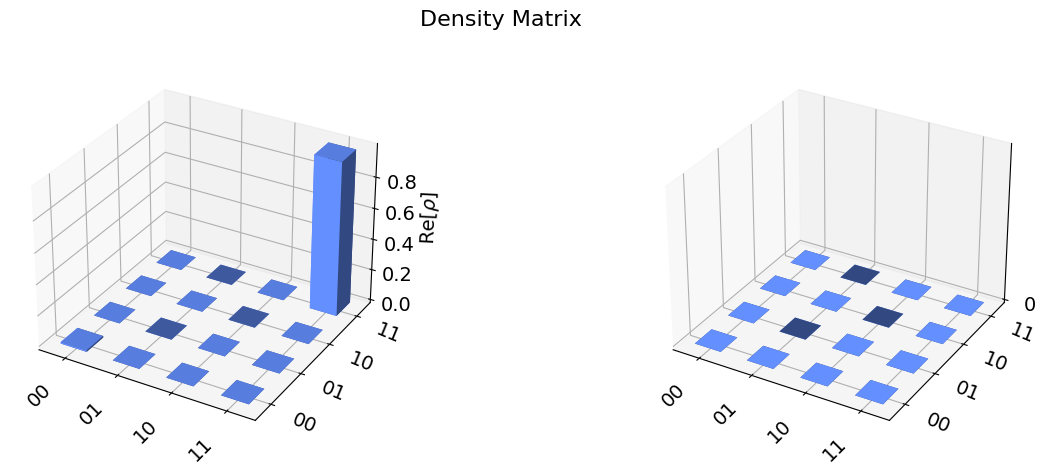

In [ ]:
from qiskit.visualization import plot_state_city
plot_state_city(rho_AB.data, title='Density Matrix')

In [ ]:
rho_B = qi.partial_trace(rho_AB,[0])
rho_A = qi.partial_trace(rho_AB,[1])

display(rho_B.draw('latex', prefix=" \\rho_{B} = "),
        rho_A.draw('latex', prefix=" \\rho_{A} = "))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
# Here 'entropy_rho_B' is equal to Sab(g)
entropy_rho_B1 = entropy(rho_B)
print('Sab(g) =', entropy_rho_B1)

Sab(g) = 0.0788621809695632


# Calculating change in entropy after projectivemeasurement of Alice

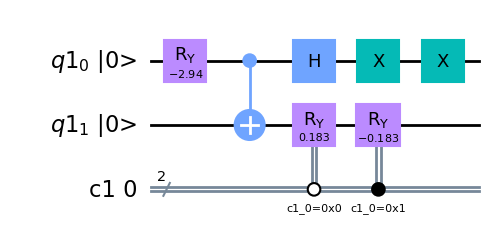

In [ ]:
#Circuit
def sin(k,h):
    return (h*k)/np.sqrt((h**2+2*k**2)**2+(h*k)**2)

qr = QuantumRegister(2)
cr = ClassicalRegister(2)

qc = QuantumCircuit(qr, cr)

# Define the parameters
k=0.2
h=1

#Prepare the ground state
alpha=-np.arcsin((1/np.sqrt(2))*(np.sqrt(1+h/np.sqrt(h**2+k**2))))

qc.ry(2*alpha,qr[0])
qc.cx(qr[0],qr[1])

# Alice's projective measurement
qc.h(qr[0])
#qc.measure(qr[0],cr[0])

#Bob's conditional operation
phi=0.5*np.arcsin(sin(k,h))
#qc.cry(-2*phi,qr[0],qr[1])
qc.ry(2*phi,qr[1]).c_if(cr[0], 0)
qc.ry(-2*phi,qr[1]).c_if(cr[0], 1)

qc.x(qr[0])
#qc.cry(2*phi,qr[0],qr[1])
qc.x(qr[0])


#Measurement of the interaction V
# Comment out qc.h(qr[1]) below for the measurement of Bob's Z term
#qc.h(qr[1])
#qc.measure(qr[1],cr[1])
#qc.measure(qr,cr)
qc.draw(output='mpl', initial_state = True)

In [ ]:
psi_AB = qi.Statevector.from_instruction(qc)
psi_AB.draw('latex', prefix='|\\psi_{AB}\\rangle = ')

<IPython.core.display.Latex object>

In [ ]:
rho_AB = qi.DensityMatrix.from_instruction(qc)
rho_AB.draw('latex', prefix='\\rho_{AB} = ')

<IPython.core.display.Latex object>

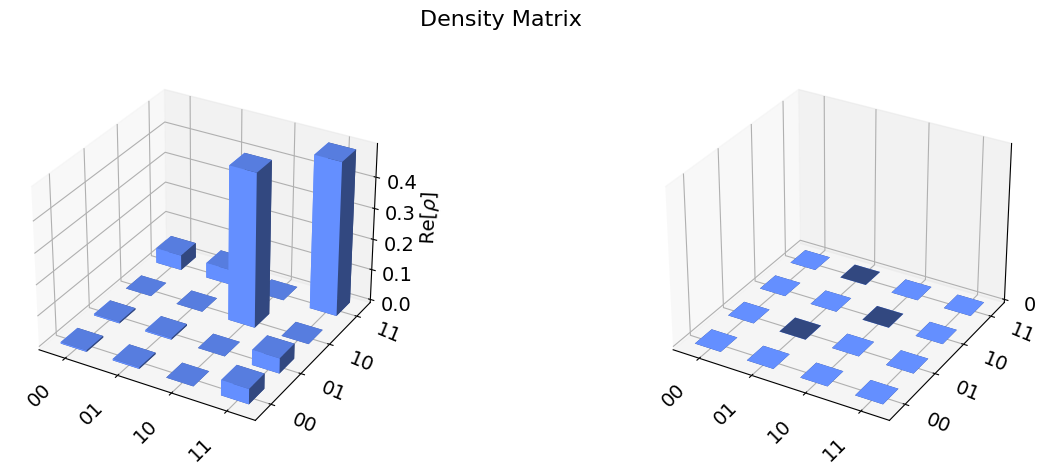

In [ ]:
from qiskit.visualization import plot_state_city
plot_state_city(rho_AB.data, title='Density Matrix')

In [ ]:
rho_B = qi.partial_trace(rho_AB,[0])
rho_A = qi.partial_trace(rho_AB,[1])

display(rho_B.draw('latex', prefix=" \\rho_{B} = "),
        rho_A.draw('latex', prefix=" \\rho_{A} = "))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
# Here 'entropy_rho_B' is equal to Sab(g)
display(rho_B.draw('latex', prefix=" \\rho_{B} = "))
entropy_rho_B2 = entropy(rho_B)
print('Sab(miu) =', entropy_rho_B2)

<IPython.core.display.Latex object>

Sab(miu) = 0.07886218096956349


In [ ]:
entropy_rho_B2 - entropy_rho_B1

2.914335439641036e-16